# Tutorial 12 - Simple Logistic Regression

This notebook was originally downloaded from: https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/Simple%20logistic%20regression.ipynb

This notebook follows John H McDonald's [Handbook of Biological Statistics](http://www.biostathandbook.com/simplelogistic.html) chapter on simple logistic regression.

This notebook is provided with a CC-BY-SA license.

In [128]:
%matplotlib inline

In [129]:
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

The original Spider data was taken from *Suzuki et al. (2006)*. For our lecture I have modified the "Spider" to "Feature". Let us say we are trying to correlate grain size with certain features. Sigmoidal function will model the probability of finding "features" with respect to grain size.

In [130]:
data = """grainsize	features
0.245	absent
0.247	absent
0.285	present
0.299	present
0.327	present
0.347	present
0.356	absent
0.36	present
0.363	absent
0.364	present
0.398	absent
0.4	present
0.409	absent
0.421	present
0.432	absent
0.473	present
0.509	present
0.529	present
0.561	absent
0.569	absent
0.594	present
0.638	present
0.656	present
0.816	present
0.853	present
0.938	present
1.036	present
1.045	present
"""
df = pd.read_table(io.StringIO(data))
#featuredict = {'present': 1,'absent': 0}
#df.features = df.features == 'present'
#d = {'no': 0, 'yes': 1}
#df['features'] = df['features'].map(d).fillna(df['features'])
#df['features'].replace({'absent': 0, 'present': 1})
df.features[df.features == 'present'] = 1
df.features[df.features == 'absent'] = 0
df.head()

/Users/alankar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alankar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,grainsize,features
0,0.245,0
1,0.247,0
2,0.285,1
3,0.299,1
4,0.327,1


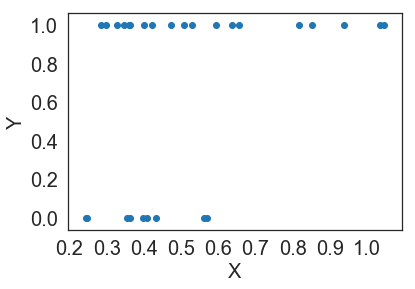

In [131]:
#X=df.grainsize
#y=df.features
plt.scatter(df.grainsize,df.features)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#df.plot.scatter(df.grainsize,df.features) # I could not make this work. Suggestions are welcome.
#plt.ylabel('Features present?')
#sns.despine()
plt.show()

In [132]:
data = """grainsize	features
0.245	absent
0.247	absent
0.285	present
0.299	present
0.327	present
0.347	present
0.356	absent
0.36	present
0.363	absent
0.364	present
0.398	absent
0.4	present
0.409	absent
0.421	present
0.432	absent
0.473	present
0.509	present
0.529	present
0.561	absent
0.569	absent
0.594	present
0.638	present
0.656	present
0.816	present
0.853	present
0.938	present
1.036	present
1.045	present
"""
df = pd.read_table(io.StringIO(data))
df.features = df.features == 'present'
df.head()

,grainsize,features
0,0.245,False
1,0.247,False
2,0.285,True
3,0.299,True
4,0.327,True


In [133]:
import sklearn.linear_model # sklearn is used for analyzing the above data

scikit-learn has a logisitic regression classifier which uses regularization. To eliminate regularization, we set the regularization parameter `C` to $10^{12}$. From web: In intuitive terms, we can think of regularization as a penalty against complexity. Increasing the regularization strength penalizes "large" weight coefficients -- our goal is to prevent that our model picks up "peculiarities," "noise," or "imagines a pattern where there is none."

In [134]:
# C=1e12 is effectively no regularization - see https://github.com/scikit-learn/scikit-learn/issues/6738
clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
clf.fit(df['grainsize'].values.reshape(-1, 1), df['features'])
print(clf.intercept_, clf.coef_)

[-1.64761964] [[5.12153717]]


$$
\text{probability of features presence} = \frac{e^{-1.6476+5.1215(grain \; size)}}{(1+e^{-1.6476+5.1215(grain \; size)}}
$$

In [135]:
def plot_log_reg(x, y, data, clf, xmin=None, xmax=None, alpha=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ax.scatter(data[x], data[y], color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax, 300)

    loss = scipy.special.expit(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    fig.tight_layout()
    sns.despine()
    return fig, ax

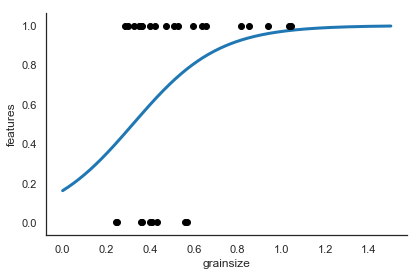

In [136]:
plot_log_reg(x='grainsize', y='features', data=df, clf=clf, xmin=0, xmax=1.5);